In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [6]:
full = pd.read_excel("data/full_merge.xlsx")

In [7]:
full.head(5)

,Unnamed: 0,eudract_nr,Sponsor,therapeutic_area,Gender_F,Gender_M,inclusion_crt,exclusion_crt,status,url,...,title,Protocol,start_date,trial_Early_Phase_I,trial_Phase_I,trial_Phase_II,trial_Phase_III,trial_Phase_IV,condition,masking_OPEN
0,2838,NaN,Aveiro University,NaN,True,True,NaN,NaN,NOT_YET_RECRUITING,NaN,...,COUGH-LESS: Chronic COUGH Management in Inters...,COUGH-LESS,2027-12-20,False,False,False,False,False,['Interstitial Lung Disease' 'Chronic Cough'],0.0
1,2775,NaN,Grupo Lusófona,NaN,True,True,NaN,NaN,NOT_YET_RECRUITING,NaN,...,Internet Delivered Therapy for Social Anxiety ...,PORTiSOFIE,2026-01-31,False,False,False,False,False,['Control Group' 'Intervention'],1.0
2,2953,NaN,Unilabs Portugal,NaN,True,True,NaN,NaN,NOT_YET_RECRUITING,NaN,...,Susceptibility-guided Vs. Empirical First-line...,NaN,2025-09-30,False,False,False,False,True,['Helicobacter Pylori Infection'],0.0
3,2738,2025-520850-13-00,Unidade Local De Saude De Coimbra E.P.E.,"[""Diseases [C] - Nervous System Diseases [C10]""]",True,True,"[""Age 18-80 years"", ""Have suffered an acute he...","[""Patients found delirious, comatose, demented...",2,https://euclinicaltrials.eu/ctis-public-api/re...,...,StroKE34 Study Protocol: a randomized Controll...,2017-002456-88,2025-07-01,False,False,True,False,False,Ischemic Stroke,NaN
4,2750,NaN,Portuguese Association of Interventional Cardi...,NaN,True,True,NaN,NaN,NOT_YET_RECRUITING,NaN,...,Portuguese Registry with Meril Myval THV Serie...,MyPORTuVal,2025-05-31,False,False,False,False,False,['Aortic Valve Stenosis' 'TAVI(Transcatheter A...,0.0


In [10]:
type(full)

pandas.core.frame.DataFrame

## Tab 1 -  Infographics

In [11]:
'''
Tab 1.1 >
- General information about the information that is being presented (one or two lines of text)
- Graph with the total number of studies
- Graph with the total number of concluded studies
- Graph with the type of studies
- Graph with the main areas which each study represent (eg. prevention, treatment, etc)
- Graph with the main condition group which each study represent (eg. respiratory diseases, gastrointestinal diseases, etc)
- Graph with studies time trends
'''

'\nTab 1.1 >\n- General information about the information that is being presented (one or two lines of text)\n- Graph with the total number of studies\n- Graph with the total number of concluded studies\n- Graph with the type of studies\n- Graph with the main areas which each study represent (eg. prevention, treatment, etc)\n- Graph with the main condition group which each study represent (eg. respiratory diseases, gastrointestinal diseases, etc)\n- Graph with studies time trends\n'

In [12]:
print("General information:")
print(full.info())

General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4917 entries, 0 to 4916
Data columns (total 81 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Unnamed: 0                                  4917 non-null   int64         
 1   eudract_nr                                  2739 non-null   object        
 2   Sponsor                                     4917 non-null   object        
 3   therapeutic_area                            2013 non-null   object        
 4   Gender_F                                    4917 non-null   bool          
 5   Gender_M                                    4917 non-null   bool          
 6   inclusion_crt                               2460 non-null   object        
 7   exclusion_crt                               2460 non-null   object        
 8   status                                      4915 non-null   object 

In [13]:
print("\nStatistics description:")
print(full.describe())


Statistics description:
        Unnamed: 0  trial_design.Comparator_description  \
count  4917.000000                                  0.0   
mean   2458.000000                                  NaN   
min       0.000000                                  NaN   
25%    1229.000000                                  NaN   
50%    2458.000000                                  NaN   
75%    3687.000000                                  NaN   
max    4916.000000                                  NaN   
std    1419.559967                                  NaN   

       trial_design_Controlled  trial_design_Randomised  \
count              4490.000000              4471.000000   
mean                  0.860802                 0.891970   
min                   0.000000                 0.000000   
25%                   1.000000                 1.000000   
50%                   1.000000                 1.000000   
75%                   1.000000                 1.000000   
max                   1.000000

In [14]:
print("\nNumber of unique values:")
print(full.isnull().sum())


Number of unique values:
Unnamed: 0             0
eudract_nr          2178
Sponsor                0
therapeutic_area    2904
Gender_F               0
                    ... 
trial_Phase_II         0
trial_Phase_III        0
trial_Phase_IV         0
condition              0
masking_OPEN         457
Length: 81, dtype: int64


In [15]:
#Graph with the total number of studies (as a counter)
total_studies = len(full)

counter_html = f"""
<div style='font-size:24px; text-align:center; border:1px solid #ccc; padding:20px; margin:10px; display:inline-block;'>
  <strong>Total of Studies</strong><br>
  <span style='font-size:48px; color:#000;'>{total_studies}</span>
</div>
"""

display(HTML(counter_html))


In [16]:
#Graph with the total number of concluded studies
completed_status_values = ["COMPLETED"]
df_completed = full[full['status'].isin(completed_status_values)]
total_completed = len(df_completed)

#Present as a counter
concluded_counter_html = f"""
<div style='font-size:24px; text-align:center; border:1px solid #ccc; padding:20px; margin:10px; display:inline-block;'>
  <strong>Total of Concluded Studies</strong><br>
  <span style='font-size:48px; color:#000;'>{total_completed}</span>
</div>
"""

display(HTML(concluded_counter_html))

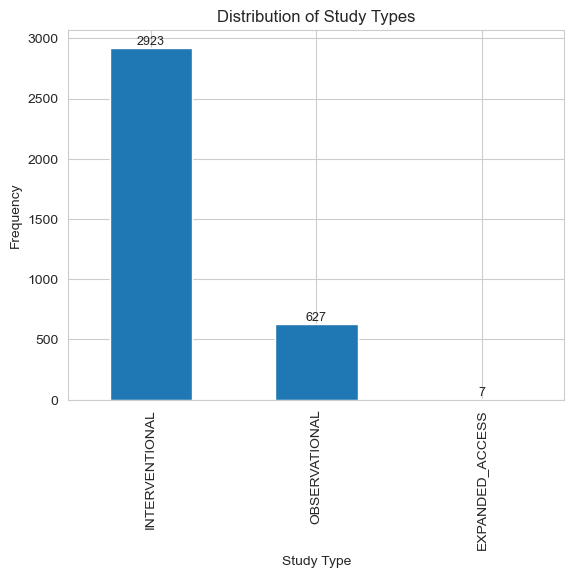

In [17]:
#Graph with the type of studies
df_study_type = full['study_type'].dropna() #delete the nulls
counts = df_study_type.value_counts()

plt.figure()

ax = counts.plot(kind='bar')
df_study_type.value_counts().plot(kind="bar")
for i, v in enumerate(counts.values):
    ax.text(i, v + 0.5, str(v),
            ha='center', va='bottom', fontsize=9)

plt.title("Distribution of Study Types")
plt.xlabel("Study Type")
plt.ylabel("Frequency")
plt.show()

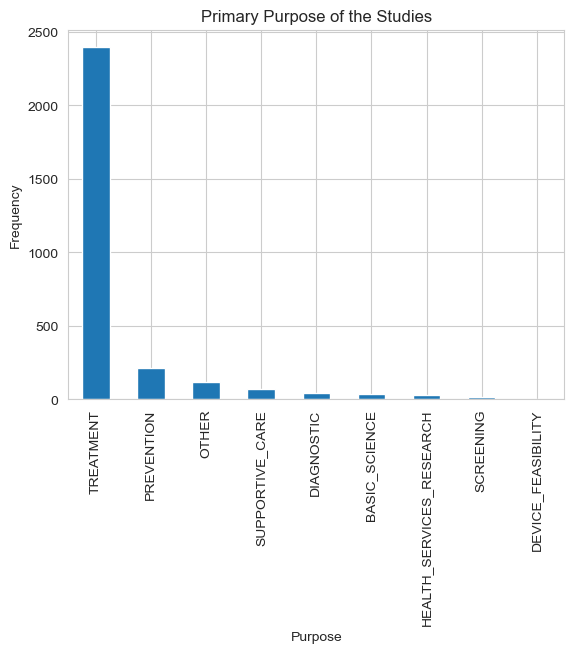

In [18]:
#Graph with the main areas which each study represent (eg. prevention, treatment, etc)
df_area = full['primary_purpose'].dropna()
plt.figure()
df_area.value_counts().plot(kind="bar")
plt.title("Primary Purpose of the Studies")
plt.xlabel("Purpose")
plt.ylabel("Frequency")
plt.show()

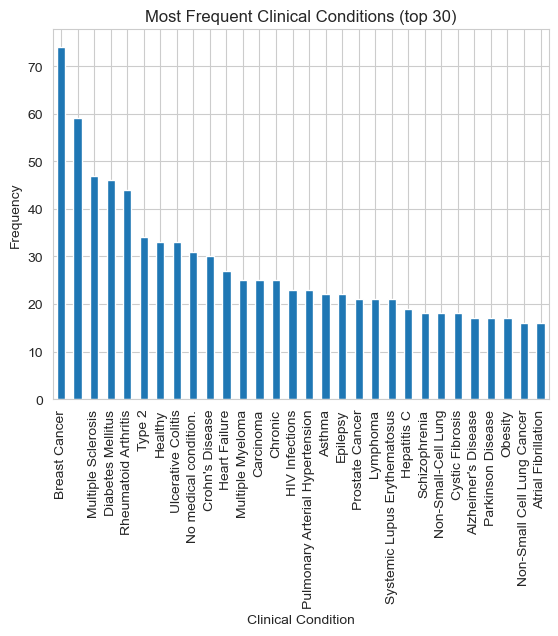

In [19]:
#Graph with the main condition group which each study represent (eg. respiratory diseases, gastrointestinal diseases, etc)
condition_counts = {}

for val in full['condition']:
    #Data Cleaning of column 'condition'
    if not isinstance(val, str):
        continue
    # Remove ""[]
    cleaned = val.strip("[]")
    # Split by ,
    items = [x.strip().strip("'").strip('"') for x in cleaned.split(',')]

    for item in items:
        if item not in condition_counts:
            condition_counts[item] = 0
        condition_counts[item] += 1

#Plot
cond_series = pd.Series(condition_counts).sort_values(ascending=False)
plt.figure()
#cond_series.plot(kind="bar")
cond_series.head(30).plot(kind="bar")  #Top 30
plt.title("Most Frequent Clinical Conditions (top 30)")
plt.xlabel("Clinical Condition")
plt.ylabel("Frequency")
plt.show()

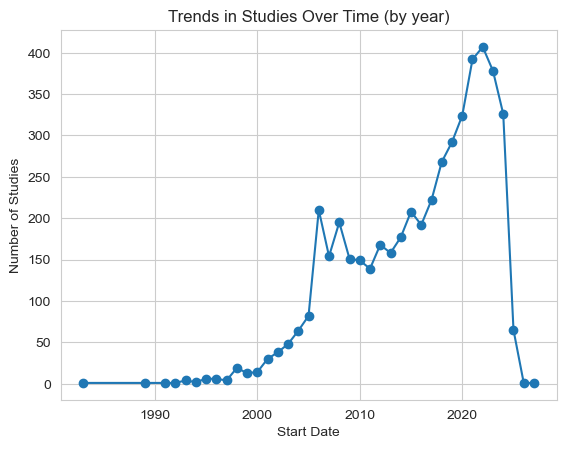

In [20]:
#Graph with studies time trends
df_time = full.dropna(subset=['start_date']).copy()
df_time['year'] = df_time['start_date'].dt.year

# Count studies by year
studies_by_year = df_time['year'].value_counts().sort_index()

plt.figure()
studies_by_year.plot(kind="line", marker="o")
plt.title("Trends in Studies Over Time (by year)")
plt.xlabel("Start Date")
plt.ylabel("Number of Studies")
plt.show()


In [21]:
### TODO: Dúvidas para o grupo

'''
- mapeamento coluna 'status'
- Graph with the main condition group which each study represent (eg. respiratory diseases, gastrointestinal diseases, etc) >>> estou a usar a coluna 'condition' mas parece-me muito espenão sei se devemos generalizar em grandes áreas clínicas (??)
'''

"\n- mapeamento coluna 'status'\n- Graph with the main condition group which each study represent (eg. respiratory diseases, gastrointestinal diseases, etc) >>> estou a usar a coluna 'condition' mas parece-me muito espenão sei se devemos generalizar em grandes áreas clínicas (??)\n"